# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [220]:
# Helper function: create directory tree
def dir_check(path):
    '''Create a folder if not present'''
    if not os.path.exists(path):
        os.makedirs(path)

def dir_create(path, dir_dictionary):
    dir_check(path)

    for dir_root in dir_dictionary['root']:                  # dir_root      = logs
        dir_check(path+dir_root+'/')                          # args.path/logs
        try:
            for dir_subroot in dir_dictionary[ dir_root ]:   # dir_subroot   = nn_logs
                dir_check(path+dir_root+'/'+dir_subroot+'/')
        except:
            pass

In [222]:
#default_dir   = 'C:/Users/mo/home/_eSDC2_/_PRJ02_/_2_WIP/_1_forge/_coding_/'
#default_newImg= 'C:/Users/mo/home/_eSDC2_/_PRJ02_/_2_WIP/_1_forge/_coding_/data/ownData/'

# create directory tree
dir_dict = {}
dir_dict = {'root'  : ['data', 'logs'],\
            'data': ['images','tboard','preprocessed','jittered'],\
            'logs'  : ['nn_logs'] }
dir_create(default_dir, dir_dict)

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file  = './data/'+'train.p'
validation_file= './data/'+'valid.p'
testing_file   = './data/'+'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
s_train, c_train = train['sizes'], train['coords']
s_valid, c_valid = valid['sizes'], valid['coords']
s_test , c_test  = test['sizes'] , test['coords']

In [7]:
# Helper function: load the dataset in memory
def data_load(path, file_pickled='train.p'):
    file = path + file_pickled
    with open(file, mode='rb') as f:
        data = pickle.load(f)
        try:
            return data['features'], data['labels'], data['sizes'], data['coords']
        except:
            return data['features'], data['labels']
            #raise IOError('the project data set are not found in the data directory')

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validing examples =", n_valid)
print("Number of testing examples  =", n_test)
print("Image data shape  =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validing examples = 4410
Number of testing examples  = 12630
Image data shape  = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [1]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
# Visualizations will be shown in the notebook.
%matplotlib inline

In [2]:
# helper function: parse_args
default_dir   = 'C:/Users/mo/home/_eSDC2_/_PRJ02_/_2_WIP/_1_forge/_testing_/'
default_newImg= 'C:/Users/mo/home/_eSDC2_/_PRJ02_/_2_WIP/_1_forge/_coding_/ownData/'
#default_dir   = 'C:/Users/mo/home/_eSDC2_/_PRJ02_/_2_WIP/_1_forge/_coding_/'
#default_newImg= 'C:/Users/mo/home/_eSDC2_/_PRJ02_/_2_WIP/_1_forge/_coding_/data/ownData/'

class PARSE_ARGS():
    def __init__(self,
                 path        = default_dir,
                 dtset       = default_dir+'data/',
                 image       = default_dir+'data/images/',
                 file_csv    = default_dir+'data/signnames.csv',
                 dico        = default_dir+'data/dictionaries/data_dictionay.csv',
                 png         = 'png',
                 cmap        = None,
                 ppro        = default_dir+'data/preprocessed/',
                 jit         = default_dir+'data/jittered/',
                 addon       = default_dir+'data/jittered/addon/',
                 full        = default_dir+'data/jittered/full/',
                 tboard      = default_dir+'data/tboard/',
                 log         = default_dir+'logs/nn_logs/',
                 ckp         = default_dir+'logs/nn_logs/',
                 tab         = [5,10],
                 n_classes   = 43,
                 epochs      = 100,
                 rate        = 8.5e-4,
                 dropout     = 0.67,
                 batch_size  = 100,
                 top_k       = 5,
                 sprImg      = default_dir+'data/tboard/_sp_valid_2144x2144.png',
                 sprTsv      = default_dir+'data/tboard/_sp_valid_2144x2144.tsv',
                 new_image   = default_newImg, 
                 serie       = '_serie01_/'):

        self.path       = path
        self.dtset      = dtset
        self.image      = image
        self.file_csv   = file_csv
        self.dico       = dico
        self.png        = png
        self.cmap       = cmap
        self.ppro       = ppro
        self.jit        = jit
        self.addon      = addon
        self.full       = full
        self.tboard     = tboard
        self.log        = log
        self.ckp        = ckp
        self.tab        = tab
        self.n_classes  = n_classes
        self.epochs     = epochs
        self.rate       = rate
        self.dropout    = dropout
        self.batch_size = batch_size
        self.top_k      = top_k
        self.sprImg     = sprImg
        self.sprTsv     = sprTsv
        self.new_image  = new_image
        self.serie      = serie

    def path(self):
        return self.path 
    def dtset (self):
        return self.dtset  
    def image (self):
        return self.image  
    def file_csv (self):
        return self.file_csv  
    def dico (self):
        return self.dico  
    def png(self):
        return self.png 
    def cmap (self):
        return self.cmap  
    def ppro (self):
        return self.ppro  
    def jit(self):
        return self.jit 
    def addon (self):
        return self.addon  
    def full (self):
        return self.full  
    def tboard(self):
        return self.tboard 
    def log(self):
        return self.log 
    def ckp(self):
        return self.ckp 
    def tab(self):
        return self.tab 
    def n_classes (self):
        return self.n_classes  
    def epochs(self):
        return self.epochs 
    def rate (self):
        return self.rate  
    def dropout(self):
        return self.dropout 
    def batch_size(self):
        return self.batch_size 
    def top_k (self):
        return self.top_k  
    def sprImg(self):
        return self.sprImg 
    def sprTsv(self):
        return self.sprTsv 
    def new_image (self):
        return self.new_image  
    def serie (self):
        return self.serie 

In [3]:
def channel(image):
    if image.shape[-1] == 3:
        ch   = 3
    elif image.shape[-1] == 32 or image.shape[-1] == 1:
        ch   = 1
    else:
        raise ValueError('[ERROR] info | channel : {}, Current image.shape: {}'.format(ch,image.shape))
    return ch

In [4]:
def color_map(image):
    if image.shape[-1] == 3:
        cMap = 'rgb' # None
    elif image.shape[-1] == 32 or image.shape[-1] == 1:
        cMap ='gray'
    else:
        raise ValueError('[ERROR] info | channel : {}, Current image.shape: {}'.format(ch,image.shape))
    return cMap


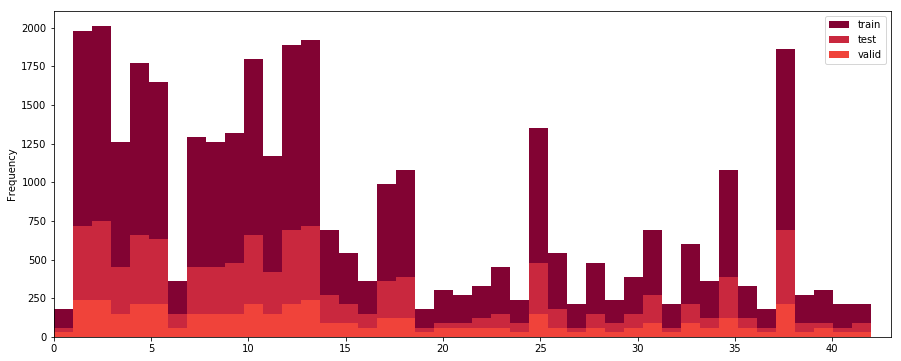

In [67]:
# parameters and placeholders
args = PARSE_ARGS()

# load the dataset
X_train, y_train, s_train, c_train = data_load(args.dtset, 'train.p')
X_valid, y_valid, s_valid, c_valid = data_load(args.dtset, 'valid.p')
X_test, y_test, s_test , c_test    = data_load(args.dtset, 'test.p')

# create dataframes and merge them
df_train  = pd.DataFrame(y_train, columns=['train'])
df_valid  = pd.DataFrame(y_valid, columns=['valid'])
df_test   = pd.DataFrame(y_test, columns=['test'])
df_labels = pd.concat([df_train, df_test, df_valid], axis=1)

# show histogram
df_labels.plot.hist(bins=43, xlim=(0,43),color=('#820333','#C9283E', '#F0433A'), figsize=(15,6))

In [103]:
# list the number of occurence per traffic sign name
frq_train, frq_valid, frq_test = df_labels['train'].value_counts(), df_labels['valid'].value_counts(), df_labels['test'].value_counts()
frq_train, frq_valid, frq_test = frq_train.sort_index(axis=0), frq_valid.sort_index(axis=0), frq_test.sort_index(axis=0)
signnames = pd.read_csv(args.file_csv, index_col=0)  
df_frequency = pd.concat([signnames, frq_train,frq_valid, frq_test], axis=1)
df_frequency.index.name = 'ClassId' #df_frequency.transpose()
df_frequency

,SignName,train,valid,test
ClassId,,,,
0,Speed limit (20km/h),180,30,60
1,Speed limit (30km/h),1980,240,720
2,Speed limit (50km/h),2010,240,750
3,Speed limit (60km/h),1260,150,450
4,Speed limit (70km/h),1770,210,660
5,Speed limit (80km/h),1650,210,630
6,End of speed limit (80km/h),360,60,150
7,Speed limit (100km/h),1290,150,450
8,Speed limit (120km/h),1260,150,450


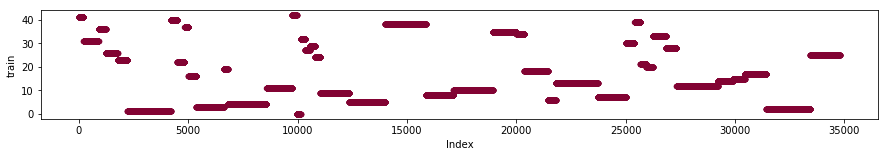

In [126]:
df_train.index.name = 'Index'
df_train.reset_index().plot.scatter(x='Index', y='train', color='#820333', figsize=(15,2))

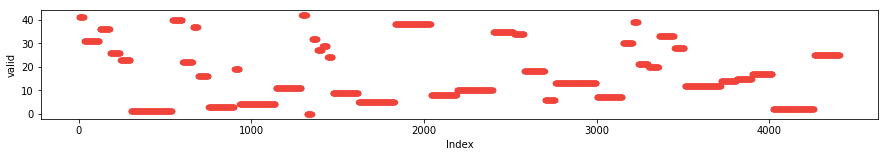

In [125]:
df_valid.index.name = 'Index'
df_valid.reset_index().plot.scatter(x='Index', y='valid', color='#F0433A', figsize=(15,2))

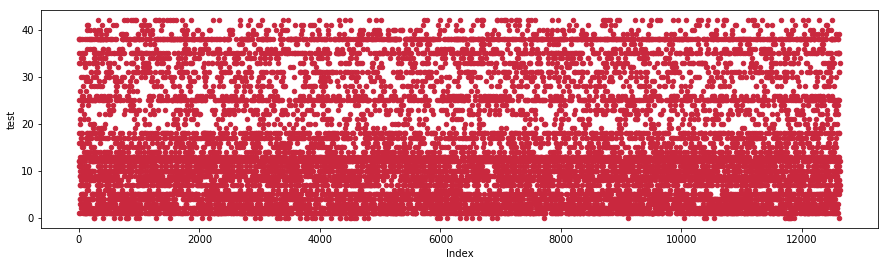

In [124]:
df_test.index.name = 'Index'
df_test.reset_index().plot.scatter(x='Index', y='test', color='#C9283E', figsize=(15,4))

In [206]:
def images_output_43(args, data_set='train.p'):
    '''Output: show 43 random images, one per class, with the bounding box around the sign in the image
    '''
    # load the dataset
    images, labels, sizes, coords = data_load(args.dtset, data_set)

    # download signnames
    signnames = pd.read_csv(args.file_csv, index_col=0)  

    # parameters
    n_classes = len(np.unique(labels))
    args.tab[0], args.tab[1] = 6, 8
    image_size = images.shape[1]

    # get dictionary[key=idClass] = array of Index(idClass)
    dico = index_list_per_class(labels)
    
    # show 43 traffic sign, one image per class
    figure, ax_images = plt.subplots( figsize=(15.0, 13.0) , nrows=args.tab[0], ncols=args.tab[1]) # (15.0, 10.0)
    figure.subplots_adjust(hspace=0.2, wspace=0.1) #hspace=0.2, wspace=0.1) # hspace=0.05, wspace=0.05
    ax_images = ax_images.ravel()    
 
    for classe_id in range(args.tab[0]*args.tab[1]):
        rx = image_size/sizes[classe_id][0]
        ry = image_size/sizes[classe_id][1]

        if classe_id < n_classes:
            index = random.randint(dico[classe_id][0], dico[classe_id][-1])  
            image = images[index]
            
            bbox  = patches.Rectangle((coords[classe_id][0]*rx, coords[classe_id][1]*ry),\
                                      (coords[classe_id][2]-coords[classe_id][0])*rx,\
                                      (coords[classe_id][3]-coords[classe_id][1])*ry,\
                                      edgecolor='#ffffcc',facecolor='none')
            ax_images[classe_id].add_patch(bbox)
            ax_images[classe_id].imshow(image, cmap=None)
            ax_images[classe_id].axis('off')

            title = str(signnames.iloc[classe_id]['SignName'])[:25]
            ax_images[classe_id].set_title(title, fontsize=8)
        else:
            ax_images[classe_id].axis('off')


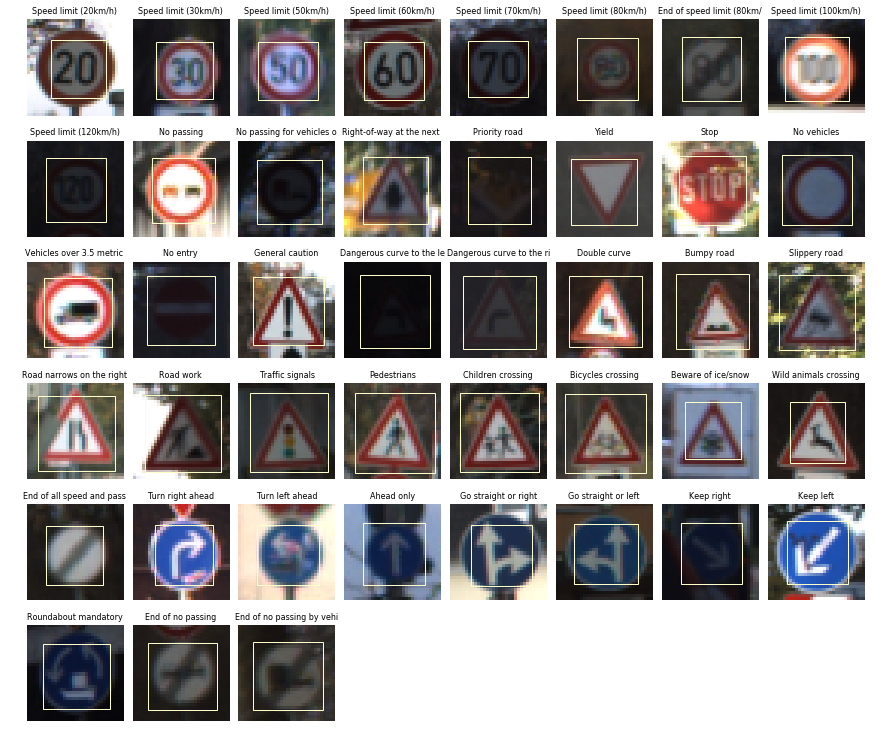

In [207]:
images_output_43(args, data_set='train.p')

In [217]:
def images_sprite(args, data_set='train.p'):
    # load dataset
    images, labels, sizes, coords = data_load(args.dtset, data_set)

    # compute width & height of the sprite image
    image_width, image_height = images.shape[1], images.shape[2]
    dIm = len(images)**0.5
    dIm = int(dIm) + (dIm - int(dIm) > 0)
    image_sprite_width, image_sprite_height = dIm*image_width, dIm*image_width
    image_name = 'images_sprite_'+data_set[:-2]+'_{}x{}'.format(image_sprite_width, image_sprite_height)

    # create blank sprite image
    images_sprite = Image.new(mode='RGBA', size=(image_sprite_width, image_sprite_height), color=None)

    # create and save the sprite image
    count, labels_list, cmap = 0, [], color_map(images[0])
    for y in range(dIm):
        for x in range(dIm):
            try:
                if cmap == 'rgb' : image = Image.fromarray(images[count],'RGB')
                if cmap == 'gray': image = Image.fromarray(images[count],'L')
                labels_list.append(labels[count])
            except:
                if cmap == 'rgb' : image = Image.new(mode='RGB', size=(image_sprite_width, image_sprite_height), color=0)
                if cmap == 'gray': image = Image.new(mode='L'  , size=(image_sprite_width, image_sprite_height), color=None)
                labels_list.append(99)
            finally:
                images_sprite.paste(image,(x*image_width,y*image_height))
                image.close()
                count+= 1

    images_sprite.save(args.sprImg) #, transparency=0 )
    np.savetxt(args.sprTsv, labels_list, '%1i')

    print('{} has been created and saved into args.tboard'.format(image_name))

In [218]:
images_sprite(args, data_set='train.p')

images_sprite_train_5984x5984 has been created and saved into args.tboard


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### 2.1. Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### 2.2. Model Architecture

In [10]:
### Define your architecture here.
# import libraries
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [3]:
# helper function: parameters
import tensorflow as tf

class PARAMETERS(object):
    def __init__(self,
                 x1         = tf.placeholder(tf.float32, (None, 32, 32, 1)),
                 x3         = tf.placeholder(tf.float32, (None, 32, 32, 3)),
                 y          = tf.placeholder(tf.int32, (None)),
                 keep_prob  = tf.placeholder(tf.float32),
                 meta_graph = 'model.meta',
                 mu         = 0,
                 sigma      = 0.1 ):

        self.x1         = x1         # input = placeholder for grayscale image
        self.x3         = x3         # input = placeholder for RGB image
        self.y          = y          # label
        self.keep_prob  = keep_prob  # dropout rate
        self.meta_graph = meta_graph
        self.mu         = mu         # hyperparameters
        self.sigma      = sigma      # hyperparameters

    def x1(self):
        return self.x1
    def x3(self):
        return self.x3
    def y(self):
        return self.y
    def keep_prob(self):
        return self.keep_prob
    def meta_graph(self):
         return self.meta_graph
    def mu(self):
        return self.mu
    def sigma(self):
        return self.sigma

In [11]:
# helper function: convolutional layer
def layer_conv(flags, input, name='layer_1_', filter=5, size_in=3, size_out=6, padding='VALID', regularization=None, activation=None, leak=0.2):
    # create a convolutional layer: input = 32x32xsize_in, output = 28x28xsize_out
    with tf.name_scope(name+'conv'):
        shape_output = [filter, filter, size_in, size_out]
        w = tf.Variable(tf.truncated_normal(shape_output, mean=flags.mu, stddev=flags.sigma), name=name + 'w')
        b = tf.Variable(tf.constant(0.1, shape=[size_out]), name=name + 'b')
        x = tf.nn.conv2d(input, w, strides=[1, 1, 1, 1], padding=padding)
        # activation
        if activation is None:
            pass
        elif activation == 'relu':
            x = tf.nn.relu(tf.add(x, b))
        elif activation == 'leaky_relu':
            f1 = 0.5 * (1 + leak)
            f2 = 0.5 * (1 - leak)
            x = f1 * tf.add(x, b) + f2 * abs(tf.add(x, b))
        # regularization
        if regularization is None:
            pass
        elif regularization == 'max_pool':
            x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding=padding)
        return x

In [12]:
# helper function: full connected layer
def layer_fcon(flags, input, name='layer_2_', size_in=3, size_out=6, regularization=None, activation=None, leak=0.2):
    # create a full connected layer: input = size_in, output = size_out
    with tf.name_scope(name+'fc'):
        w = tf.Variable(tf.truncated_normal([size_in, size_out], stddev=flags.sigma), name=name + 'w')
        b = tf.Variable(tf.constant(0.1, shape=[size_out]), name=name + 'b')
        x = tf.add(tf.matmul(input, w), b)
        # activation
        if activation is None:
            pass
        elif activation == 'relu':
            x = tf.nn.relu(tf.add(x, b))
        elif activation == 'leaky_relu':
            f1 = 0.5 * (1 + leak)
            f2 = 0.5 * (1 - leak)
            x = f1 * tf.add(x, b) + f2 * abs(tf.add(x, b))
        # regularization
        if regularization is None:
            pass
        elif regularization == 'dropout':
            x = tf.nn.dropout(x, flags.keep_prob)
        return x

In [13]:
# helper function: flatten layer
def layer_flatten(input, name='layer_3_'):
    with tf.name_scope(name+'fl'):
        x = flatten(input)
    return x

In [14]:
# helper function: evaluate the loss and accuracy of the model
def evaluate(args, flags, logits, images, labels, one_hot_y):
    prediction_correct = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(prediction_correct, tf.float32))

    n_images       = len(images)
    accuracy_total = 0
    sess           = tf.get_default_session()

    if channel(images[0]) == 3:
        x = flags.x3
    else:
        x = flags.x1

    for offset in range(0, n_images, args.batch_size):
        batch_x, batch_y = images[offset:offset + args.batch_size], labels[offset:offset + args.batch_size]
        accuracy         = sess.run(accuracy_operation, feed_dict={x: batch_x, flags.y: batch_y, flags.keep_prob: args.dropout})
        accuracy_total  += (accuracy * len(batch_x))
    return accuracy_total / n_images


In [15]:
# helper function: create a CNN model
class MODEL(object):
    def __init__(self):
        pass

    def model_1(self, flags, image):
        '''
        Layer 1: Conv{In:32x32xchannel;Out:28x28x6} > Activ. > mxPooling{In:28x28x6;Out:14x14x6}
        Layer 2: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        Flatten: Input = 5x5xsize_out. Output = 400.
        Layer 3: Fully Connected{In:400;Out:120} > Activ. > Dropout
        Layer 4: Fully Connected{In:120;Out:84} > Activ. > Dropout
        Layer 5: Fully Connected{In:84;Out:43}
        '''
        if channel(image) == 3:
            model = layer_conv(flags, flags.x3, name='layer_1_', filter=5, size_in=3, size_out=6, padding='VALID', regularization='max_pool', activation='relu')
        else:
            model = layer_conv(flags, flags.x1, name='layer_1_', filter=5, size_in=1, size_out=6, padding='VALID', regularization='max_pool', activation='relu')
        model = layer_conv(flags, model, name='layer_2_', filter=5, size_in=6, size_out=16, padding='VALID', regularization='max_pool', activation='relu')
        model = layer_flatten(model, name='layer_3_')
        model = layer_fcon(flags, model, name='layer_4_', size_in=400, size_out=120, regularization='dropout', activation='relu')
        model = layer_fcon(flags, model, name='layer_5_', size_in=120, size_out=84, regularization='dropout', activation='relu')
        model = layer_fcon(flags, model, name='layer_6_', size_in=84, size_out=43, regularization=None, activation=None)
        return model
    
    def model_2(self, flags, image):
        '''
        Layer 1: Conv{In:32x32xch;Out:28x28x6} > Activ. > mxPooling{In:28x28x6;Out:14x14x6}
        Layer 2: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        Layer 3: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        Flatten. Input = 5x5xsize_out. Output = 400
        Dropout
        Layer 4: Fully Connected{In:120;Out:84} > Activ. > Dropout
        Layer 5: Fully Connected{In:120;Out:84} > Activ. > Dropout
        Layer 6: Fully Connected{In:84;Out:43}
        '''
        if channel(image) == 3:
            model_c1 = layer_conv(flags, flags.x3, name='layer_c1_', filter=5, size_in=3, size_out=6, padding='VALID', regularization='max_pool', activation='relu')
        else:
            model_c1 = layer_conv(flags, flags.x1, name='layer_c1_', filter=5, size_in=1, size_out=6, padding='VALID', regularization='max_pool', activation='relu')
        model_c2 = layer_conv(flags, model_c1, name='layer_c2_', filter=5, size_in=6, size_out=16, padding='VALID', regularization='max_pool', activation='relu')
        model_c3 = layer_conv(flags, model_c2, name='layer_c3_', filter=5, size_in=16, size_out=400, padding='VALID', regularization=None, activation='relu')
        model_f4 = layer_flatten(model_c2, name='layer_f4_')
        model_f5 = layer_flatten(model_c3, name='layer_f5_')
        model_f6 = tf.concat([model_f5,model_f4], 1)
        model    = tf.nn.dropout(model_f6, flags.keep_prob)
        model    = layer_fcon(flags, model, name='layer_fc7_', size_in=800, size_out=120, regularization=None, activation='relu')
        model    = layer_fcon(flags, model, name='layer_fc8_', size_in=120, size_out=84, regularization=None, activation='relu')
        model    = layer_fcon(flags, model, name='layer_fc9_', size_in=84, size_out=43, regularization=None, activation=None)
        return model
    
    def model_2b(self, flags, image):
        '''
        Layer 1: Conv{In:32x32xch;Out:28x28x6} > Activ. > mxPooling{In:28x28x6;Out:14x14x6}
        Layer 2: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        Layer 3: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        Flatten. Input = 5x5xsize_out. Output = 400.
        Layer 4: Fully Connected{In:120;Out:84} > Activ. > Dropout
        Layer 5: Fully Connected{In:120;Out:84} > Activ. > Dropout
        Layer 6: Fully Connected{In:84;Out:43}
        '''
        if channel(image) == 3:
            model_c1 = layer_conv(flags, flags.x3, name='layer_c1_', filter=5, size_in=3, size_out=6, padding='VALID', regularization='max_pool', activation='relu')
        else:
            model_c1 = layer_conv(flags, flags.x1, name='layer_c1_', filter=5, size_in=1, size_out=6, padding='VALID', regularization='max_pool', activation='relu')
        model_c2 = layer_conv(flags, model_c1, name='layer_c2_', filter=5, size_in=6, size_out=16, padding='VALID', regularization='max_pool', activation='relu')
        model_c3 = layer_conv(flags, model_c2, name='layer_c3_', filter=5, size_in=16, size_out=400, padding='VALID', regularization=None, activation='relu')
        model_f4 = layer_flatten(model_c2, name='layer_f4_')
        model_f5 = layer_flatten(model_c3, name='layer_f5_')
        model_f6 = tf.concat([model_f5,model_f4], 1)
        model    = layer_fcon(flags, model_f6, name='layer_fc7_', size_in=800, size_out=120, regularization='dropout', activation='relu')
        model    = layer_fcon(flags, model, name='layer_fc8_', size_in=120, size_out=84, regularization='dropout', activation='relu')
        model    = layer_fcon(flags, model, name='layer_fc9_', size_in=84, size_out=43, regularization=None, activation=None)
        return model
    
    def model_2c(self, flags, image):
        '''
        Layer 1: Conv{In:32x32xch;Out:28x28x6} > Activ. > mxPooling{In:28x28x6;Out:14x14x6}
        Layer 2: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        Layer 3: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        Flatten. Input = 5x5xsize_out. Output = 400.
        Layer 4: Fully Connected{In:120;Out:84} > Activ. > Dropout
        Layer 5: Fully Connected{In:120;Out:43} > Activ. > Dropout
        '''
        if channel(image) == 3:
            model_c1 = layer_conv(flags, flags.x3, name='layer_c1_', filter=5, size_in=3, size_out=6, padding='VALID', regularization='max_pool', activation='relu')
        else:
            model_c1 = layer_conv(flags, flags.x1, name='layer_c1_', filter=5, size_in=1, size_out=6, padding='VALID', regularization='max_pool', activation='relu')
        model_c2 = layer_conv(flags, model_c1, name='layer_c2_', filter=5, size_in=6, size_out=16, padding='VALID', regularization='max_pool', activation='relu')
        model_c3 = layer_conv(flags, model_c2, name='layer_c3_', filter=5, size_in=16, size_out=400, padding='VALID', regularization=None, activation='relu')
        model_f4 = layer_flatten(model_c2, name='layer_f4_')
        model_f5 = layer_flatten(model_c3, name='layer_f5_')
        model_f6 = tf.concat([model_f5,model_f4], 1)
        model    = layer_fcon(flags, model_f6, name='layer_fc7_', size_in=800, size_out=120, regularization='dropout', activation='relu')
        model    = layer_fcon(flags, model, name='layer_fc9_', size_in=120, size_out=43, regularization=None, activation=None)
        return model
    
    def model_2d(self, flags, image):
        '''
        Layer 1: Conv{In:32x32xch;Out:28x28x6} > Activ. > mxPooling{In:28x28x6;Out:14x14x6}
        Layer 2: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        Layer 3: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        Flatten. Input = 5x5xsize_out. Output = 400.
        Layer 4: Fully Connected{In:120;Out:84} > Activ. > Dropout
        Layer 5: Fully Connected{In:120;Out:43} > Activ. > Dropout
        '''
        if channel(image) == 3:
            model_c1 = layer_conv(flags, flags.x3, name='layer_c1_', filter=5, size_in=3, size_out=6, padding='VALID', regularization='max_pool', activation='relu')
        else:
            model_c1 = layer_conv(flags, flags.x1, name='layer_c1_', filter=5, size_in=1, size_out=6, padding='VALID', regularization='max_pool', activation='relu')
        model_c2 = layer_conv(flags, model_c1, name='layer_c2_', filter=5, size_in=6, size_out=16, padding='VALID', regularization='max_pool', activation='relu')
        model_c3 = layer_conv(flags, model_c2, name='layer_c3_', filter=5, size_in=16, size_out=400, padding='VALID', regularization=None, activation='relu')
        model_f4 = layer_flatten(model_c2, name='layer_f4_')
        model_f5 = layer_flatten(model_c3, name='layer_f5_')
        model_f6 = tf.concat([model_f5,model_f4], 1)
        model    = tf.nn.dropout(model_f6, flags.keep_prob)
        model    = layer_fcon(flags, model_f6, name='layer_fc6_', size_in=800, size_out=43, regularization=None, activation=None)
        return model
    
    def model_3(self, flags, image):
        '''
        Layer 1: Conv{In:32x32xch;Out:32x32xch}
        Layer 2: Conv{In:32x32xch;Out:32x32x32}
        Layer 3: Conv{In:32x32x32;Out:32x32x32} > Activ. > mxPooling{In:32x32x32;Out:16x16x32}
        Layer 4: Conv{In:16x16x32;Out:16x16x64} > Activ. > mxPooling{In:16x16x64;Out:16x16x64}
        Layer 5: Conv{In:16x16x64;Out:16x16x64} > Activ. > mxPooling{In:16x16x64;Out:8x8x16}
        Layer 6: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        Layer 7: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        Flatten. Input = 5x5xsize_out. Output = 400.
        Layer 9: Fully Connected{In:120;Out:84} > Activ. > Dropout
        Layer 10: Fully Connected{In:120;Out:84} > Activ. > Dropout
        '''
        # stage 1
        if channel(image) == 3:
            model_c1 = layer_conv(flags, flags.x3, name='layer_c1_', filter=1, size_in=3, size_out=3, padding='SAME', regularization=None, activation='relu')
        else:
            model_c1 = layer_conv(flags, flags.x1, name='layer_c1_', filter=1, size_in=1, size_out=3, padding='SAME', regularization=None, activation='relu')
        model_c2 = layer_conv(flags, model_c1, name='layer_c2_', filter=5, size_in=3, size_out=32, padding='SAME', regularization=None, activation='relu')
        model_c3 = layer_conv(flags, model_c2, name='layer_c3_', filter=5, size_in=32, size_out=32, padding='SAME', regularization='max_pool', activation='relu')
        model_d4 = tf.nn.dropout(model_c3, flags.keep_prob)
        # stage 2
        model_c5 = layer_conv(flags, model_d4, name='layer_c5_', filter=5, size_in=32, size_out=64, padding='SAME', regularization=None, activation='relu')
        model_c6 = layer_conv(flags, model_c5, name='layer_c6_', filter=5, size_in=64, size_out=64, padding='SAME', regularization='max_pool', activation='relu')
        model_d7 = tf.nn.dropout(model_c6, flags.keep_prob)
        # stage 3
        model_c8 = layer_conv(flags, model_d7, name='layer_c8_', filter=5, size_in=64, size_out=128, padding='SAME', regularization=None, activation='relu')
        model_c9 = layer_conv(flags, model_c8, name='layer_c9_', filter=5, size_in=128, size_out=128, padding='SAME', regularization='max_pool', activation='relu')
        model_d10= tf.nn.dropout(model_c9, flags.keep_prob)
        # stage 4
        model_f11= layer_flatten(model_d4 , name='layer_f11_')
        model_f12= layer_flatten(model_d7 , name='layer_f12_')
        model_f13= layer_flatten(model_d10, name='layer_f13_')
        model_f14= tf.concat([model_f11,model_f12,model_f13], 1)
        # stage 5
        model = layer_fcon(flags, model_f14, name='layer_fc15_', size_in=14336, size_out=1024, regularization='dropout', activation='relu')
        model = layer_fcon(flags, model, name='layer_fc16_', size_in=1024 , size_out=1024, regularization='dropout', activation='relu')
        model = layer_fcon(flags, model, name='layer_fc17_', size_in=1024, size_out=43, regularization=None, activation=None)
        return model
    
    def model_4(self, flags, image):
        '''
        note: (w - f + 2*p)/s +1  -> 28 = (32 - 5 + 2*0)/1 + 1
        
        Layer 1: Conv{In:32x32xch;Out:28x28x6} > Activ. > {Out:28x28x6}
        Layer 2: Conv{In:28x28x6;Out:24x24x16} > Activ. > mxPooling{In:24x24x16;Out:12x12x16}
        Layer 3: Conv{In:12x12x16;Out:8x8x32} > Activ. > {Out:8x8x32}
        Layer 4: Conv{In:8x8x32;Out:4x4x64} > Activ. > mxPooling{In:4x4x64;Out:2x2x64}
        Layer 5: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        Layer 6: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        Flatten. Input = 5x5xsize_out. Output = 400.
        Activation
        Flatten. Input = 5x5xsize_out. Output = 400.
        Layer 8: Fully Connected{In:19808;Out:9904} > Activ. > Dropout
        Layer 9: Fully Connected{In:9904;Out:1238}
        Layer 11: Fully Connected{In:1238;Out:619} > Activ. > Dropout > Activ. > Dropout
        Layer 12: Fully Connected{In:619;Out:120} > Activ. > Dropout
        Layer 13: Fully Connected{In:120;Out:84} > Activ. > Dropout
        Layer 14: Fully Connected{In:84;Out:43}
        '''
        # stage 1
        if channel(image) == 3:
            model_c1 = layer_conv(flags, flags.x3, name='layer_c1_', filter=5, size_in=3, size_out=32, padding='VALID', regularization=None, activation='relu')
        else:
            model_c1 = layer_conv(flags, flags.x1, name='layer_c1_', filter=5, size_in=1, size_out=32, padding='VALID', regularization=None, activation='relu')
        model_c2 = layer_conv(flags, model_c1, name='layer_c2_', filter=3, size_in=32, size_out=32, padding='VALID', regularization='max_pool', activation='relu')
        model_c3 = layer_conv(flags, model_c2, name='layer_c3_', filter=3, size_in=32, size_out=64, padding='VALID', regularization=None, activation='relu')
        model_c4 = layer_conv(flags, model_c3, name='layer_c4_', filter=3, size_in=64, size_out=128, padding='VALID', regularization='max_pool', activation='relu')
        model_c5 = layer_conv(flags, model_c4, name='layer_c5_', filter=2, size_in=128, size_out=512, padding='VALID', regularization=None, activation='relu')
        model_c6 = layer_conv(flags, model_c5, name='layer_c6_', filter=2, size_in=512, size_out=1024, padding='VALID', regularization='max_pool', activation='relu')
        # stage 2
        model_f7 = layer_flatten(model_c2 , name='layer_f7_')
        model_f8 = layer_flatten(model_c3 , name='layer_f8_')
        model_f9 = tf.concat([model_f8,model_f7], 1)
        model_a10= tf.nn.relu(model_f9)
        # stage 3
        model_f11= layer_flatten(model_c4, name='layer_f11_')
        model_f12= layer_flatten(model_c5, name='layer_f12_')
        model_f13= tf.concat([model_f11,model_f12], 1)
        model_a14= tf.nn.relu(model_f13)
        # stage 4
        model_f15= tf.concat([model_a14,model_a10], 1)
        model_d16= tf.nn.dropout(model_f15, flags.keep_prob)
        # stage 5
        model = layer_fcon(flags, model_d16, name='layer_fc17_', size_in=19808, size_out=9904, regularization='dropout', activation='relu')
        model = layer_fcon(flags, model, name='layer_fc18_', size_in=9904 , size_out=1238, regularization='dropout', activation='relu')
        model = layer_fcon(flags, model, name='layer_fc19_', size_in=1238 , size_out=619, regularization='dropout', activation='relu')
        model = layer_fcon(flags, model, name='layer_fc20_', size_in=619 , size_out=120, regularization='dropout', activation='relu')
        model = layer_fcon(flags, model, name='layer_fc21_', size_in=120 , size_out=84, regularization='dropout', activation='relu')

        model = layer_fcon(flags, model, name='layer_fc22_', size_in=84, size_out=43, regularization=None, activation=None)
        return model

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import os
import pickle
import numpy as np

In [17]:
# helper function: train the model
def model_train(args, flags, logits, images_train, labels_train, images_validation, labels_validation):
    one_hot_y = tf.one_hot(flags.y, 43)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate=args.rate)
    training_operation = optimizer.minimize(loss_operation)

    if channel(images_train[0]) == 3:
        x = flags.x3
    else:
        x = flags.x1

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_images = len(images_train)

        print('Training... rate: {}, epochs: {}, batch size: {}, dropout rate: {}'.format(args.rate, args.epochs, args.batch_size, args.dropout))
        print()
        for i in range(args.epochs):
            images_train, labels_train = shuffle(images_train, labels_train)
            for offset in range(0, n_images, args.batch_size):
                end = offset + args.batch_size
                batch_x, batch_y = images_train[offset:end], labels_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, flags.y: batch_y, flags.keep_prob: args.dropout})

            validation_accuracy = evaluate(args, flags, logits, images_validation, labels_validation, one_hot_y)
            print('epoch: {:3} | validation accuracy : {:.1%}'.format(i + 1, validation_accuracy))

        saver = tf.train.Saver()
        saver.save(sess, './model')
        print("Model saved")

In [18]:
# helper function: test the model
def model_test(args, flags, logits, images_test, labels_test):
    one_hot_y = tf.one_hot(flags.y, 43)
    with tf.Session() as sess:
        saver_new = tf.train.Saver() # tf.train.import_meta_graph('./model.meta')
        saver_new.restore(sess, tf.train.latest_checkpoint('./'))
        accuracy_test = evaluate(args, flags, logits,  images_test, labels_test, one_hot_y)
        print("test accuracy = {:.3f}".format(accuracy_test))

In [19]:
# helper function: to be done
def generator():
    pass


def early_stop():
    pass

In [20]:
# parameters and placeholders
args  = PARSE_ARGS()
flags = PARAMETERS()

# load and shuffle data
X_train, y_train = data_load(args.full, 'JIT_full_3000_train_1Gray.p')
X_valid, y_valid, s_valid, c_valid = data_load(args.ppro, 'valid_1Gray.p')
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)

# build the model
cnn    = MODEL()

In [73]:
# train the model with MODEL_1 and grayscale images
model_train(args, flags, cnn.model_1(flags, X_train[0]), X_train, y_train, X_valid, y_valid)

Training... rate: 0.00085, epochs: 100, batch size: 100, dropout rate: 0.67

epoch:   1 | validation accuracy : 0.741
epoch:   2 | validation accuracy : 0.835
epoch:   3 | validation accuracy : 0.869
epoch:   4 | validation accuracy : 0.879
epoch:   5 | validation accuracy : 0.896
epoch:   6 | validation accuracy : 0.889
epoch:   7 | validation accuracy : 0.898
epoch:   8 | validation accuracy : 0.913
epoch:   9 | validation accuracy : 0.918
epoch:  10 | validation accuracy : 0.926
epoch:  11 | validation accuracy : 0.921
epoch:  12 | validation accuracy : 0.928
epoch:  13 | validation accuracy : 0.928
epoch:  14 | validation accuracy : 0.927
epoch:  15 | validation accuracy : 0.930
epoch:  16 | validation accuracy : 0.929
epoch:  17 | validation accuracy : 0.932
epoch:  18 | validation accuracy : 0.931
epoch:  19 | validation accuracy : 0.939
epoch:  20 | validation accuracy : 0.938
epoch:  21 | validation accuracy : 0.932
epoch:  22 | validation accuracy : 0.949
epoch:  23 | validati

In [76]:
# train the model with MODEL_2 and grayscale images
model_train(args, flags, cnn.model_2(flags, X_train[0]), X_train, y_train, X_valid, y_valid)

Training... rate: 0.00085, epochs: 100, batch size: 100, dropout rate: 0.67

epoch:   1 | validation accuracy : 0.871
epoch:   2 | validation accuracy : 0.906
epoch:   3 | validation accuracy : 0.910
epoch:   4 | validation accuracy : 0.929
epoch:   5 | validation accuracy : 0.928
epoch:   6 | validation accuracy : 0.934
epoch:   7 | validation accuracy : 0.946
epoch:   8 | validation accuracy : 0.941
epoch:   9 | validation accuracy : 0.941
epoch:  10 | validation accuracy : 0.932
epoch:  11 | validation accuracy : 0.936
epoch:  12 | validation accuracy : 0.940
epoch:  13 | validation accuracy : 0.946
epoch:  14 | validation accuracy : 0.947
epoch:  15 | validation accuracy : 0.946
epoch:  16 | validation accuracy : 0.946
epoch:  17 | validation accuracy : 0.929
epoch:  18 | validation accuracy : 0.951
epoch:  19 | validation accuracy : 0.950
epoch:  20 | validation accuracy : 0.944
epoch:  21 | validation accuracy : 0.947
epoch:  22 | validation accuracy : 0.949
epoch:  23 | validati

In [88]:
# train the model with MODEL_2b and grayscale images
model_train(args, flags, cnn.model_2b(flags, X_train[0]), X_train, y_train, X_valid, y_valid)

Training... rate: 0.00085, epochs: 100, batch size: 100, dropout rate: 0.67

epoch:   1 | validation accuracy : 0.822
epoch:   2 | validation accuracy : 0.893
epoch:   3 | validation accuracy : 0.912
epoch:   4 | validation accuracy : 0.923
epoch:   5 | validation accuracy : 0.928
epoch:   6 | validation accuracy : 0.936
epoch:   7 | validation accuracy : 0.932
epoch:   8 | validation accuracy : 0.937
epoch:   9 | validation accuracy : 0.939
epoch:  10 | validation accuracy : 0.939
epoch:  11 | validation accuracy : 0.954
epoch:  12 | validation accuracy : 0.945
epoch:  13 | validation accuracy : 0.958
epoch:  14 | validation accuracy : 0.955
epoch:  15 | validation accuracy : 0.951
epoch:  16 | validation accuracy : 0.961
epoch:  17 | validation accuracy : 0.951
epoch:  18 | validation accuracy : 0.959
epoch:  19 | validation accuracy : 0.956
epoch:  20 | validation accuracy : 0.957
epoch:  21 | validation accuracy : 0.959
epoch:  22 | validation accuracy : 0.961
epoch:  23 | validati

In [91]:
# train the model with MODEL_2c and grayscale images
model_train(args, flags, cnn.model_2c(flags, X_train[0]), X_train, y_train, X_valid, y_valid)

Training... rate: 0.00085, epochs: 100, batch size: 100, dropout rate: 0.67

epoch:   1 | validation accuracy : 85.9%
epoch:   2 | validation accuracy : 89.8%
epoch:   3 | validation accuracy : 92.9%
epoch:   4 | validation accuracy : 92.4%
epoch:   5 | validation accuracy : 94.4%
epoch:   6 | validation accuracy : 94.7%
epoch:   7 | validation accuracy : 94.9%
epoch:   8 | validation accuracy : 94.8%
epoch:   9 | validation accuracy : 95.0%
epoch:  10 | validation accuracy : 95.6%
epoch:  11 | validation accuracy : 94.9%
epoch:  12 | validation accuracy : 95.6%
epoch:  13 | validation accuracy : 95.3%
epoch:  14 | validation accuracy : 94.8%
epoch:  15 | validation accuracy : 95.2%
epoch:  16 | validation accuracy : 94.6%
epoch:  17 | validation accuracy : 94.1%
epoch:  18 | validation accuracy : 95.6%
epoch:  19 | validation accuracy : 94.5%
epoch:  20 | validation accuracy : 94.4%
epoch:  21 | validation accuracy : 95.5%
epoch:  22 | validation accuracy : 94.8%
epoch:  23 | validati

In [93]:
# train the model with MODEL_2d and grayscale images
model_train(args, flags, cnn.model_2d(flags, X_train[0]), X_train, y_train, X_valid, y_valid)

Training... rate: 0.00085, epochs: 100, batch size: 100, dropout rate: 0.67

epoch:   1 | validation accuracy : 90.3%
epoch:   2 | validation accuracy : 92.0%
epoch:   3 | validation accuracy : 93.6%
epoch:   4 | validation accuracy : 91.7%
epoch:   5 | validation accuracy : 93.7%
epoch:   6 | validation accuracy : 93.9%
epoch:   7 | validation accuracy : 92.4%
epoch:   8 | validation accuracy : 93.8%
epoch:   9 | validation accuracy : 92.7%
epoch:  10 | validation accuracy : 94.8%
epoch:  11 | validation accuracy : 94.3%
epoch:  12 | validation accuracy : 93.7%
epoch:  13 | validation accuracy : 93.9%
epoch:  14 | validation accuracy : 94.3%
epoch:  15 | validation accuracy : 92.7%
epoch:  16 | validation accuracy : 94.3%
epoch:  17 | validation accuracy : 96.0%
epoch:  18 | validation accuracy : 95.2%
epoch:  19 | validation accuracy : 94.9%
epoch:  20 | validation accuracy : 95.1%
epoch:  21 | validation accuracy : 95.4%
epoch:  22 | validation accuracy : 95.1%
epoch:  23 | validati

In [94]:
# train the model with MODEL_3 and grayscale images
model_train(args, flags, cnn.model_3(flags, X_train[0]), X_train, y_train, X_valid, y_valid)

Training... rate: 0.00085, epochs: 100, batch size: 100, dropout rate: 0.67

epoch:   1 | validation accuracy : 54.3%
epoch:   2 | validation accuracy : 69.0%
epoch:   3 | validation accuracy : 76.2%
epoch:   4 | validation accuracy : 81.8%
epoch:   5 | validation accuracy : 85.4%
epoch:   6 | validation accuracy : 89.2%
epoch:   7 | validation accuracy : 87.9%
epoch:   8 | validation accuracy : 89.9%
epoch:   9 | validation accuracy : 90.9%
epoch:  10 | validation accuracy : 90.7%
epoch:  11 | validation accuracy : 91.2%
epoch:  12 | validation accuracy : 93.1%
epoch:  13 | validation accuracy : 93.1%
epoch:  14 | validation accuracy : 93.0%
epoch:  15 | validation accuracy : 94.6%
epoch:  16 | validation accuracy : 94.3%
epoch:  17 | validation accuracy : 93.9%
epoch:  18 | validation accuracy : 94.9%
epoch:  19 | validation accuracy : 94.8%
epoch:  20 | validation accuracy : 94.3%
epoch:  21 | validation accuracy : 94.9%
epoch:  22 | validation accuracy : 93.4%
epoch:  23 | validati

In [20]:
# train the model with MODEL_4 and grayscale images
model_train(args, flags, cnn.model_4(flags, X_train[0]), X_train, y_train, X_valid, y_valid)

ResourceExhaustedError: OOM when allocating tensor with shape[19808,9904]
	 [[Node: layer_fc17_fc/truncated_normal/TruncatedNormal = TruncatedNormal[T=DT_INT32, dtype=DT_FLOAT, seed=0, seed2=0, _device="/job:localhost/replica:0/task:0/gpu:0"](layer_fc17_fc/truncated_normal/shape)]]

Caused by op 'layer_fc17_fc/truncated_normal/TruncatedNormal', defined at:
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\envs\keras\Lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\envs\keras\Lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\envs\keras\Lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\envs\keras\Lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\envs\keras\Lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\envs\keras\Lib\site-packages\IPython\core\interactiveshell.py", line 2856, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\envs\keras\Lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-f92857ecd167>", line 2, in <module>
    model_train(args, flags, cnn.model_4(flags, X_train[0]), X_train, y_train, X_valid, y_valid)
  File "<ipython-input-14-177cb047c3df>", line 204, in model_4
    model = layer_fcon(flags, model_d16, name='layer_fc17_', size_in=19808, size_out=9904, regularization='dropout', activation='relu')
  File "<ipython-input-11-0a793d331e68>", line 5, in layer_fcon
    w = tf.Variable(tf.truncated_normal([size_in, size_out], stddev=flags.sigma), name=name + 'w')
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\envs\keras\Lib\site-packages\tensorflow\python\ops\random_ops.py", line 172, in truncated_normal
    shape_tensor, dtype, seed=seed1, seed2=seed2)
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\envs\keras\Lib\site-packages\tensorflow\python\ops\gen_random_ops.py", line 336, in _truncated_normal
    seed=seed, seed2=seed2, name=name)
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\envs\keras\Lib\site-packages\tensorflow\python\framework\op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\envs\keras\Lib\site-packages\tensorflow\python\framework\ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\mo\home\_INSTALL_\Anaconda3\envs\keras\Lib\site-packages\tensorflow\python\framework\ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[19808,9904]
	 [[Node: layer_fc17_fc/truncated_normal/TruncatedNormal = TruncatedNormal[T=DT_INT32, dtype=DT_FLOAT, seed=0, seed2=0, _device="/job:localhost/replica:0/task:0/gpu:0"](layer_fc17_fc/truncated_normal/shape)]]


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [20]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import glob
import cv2
import numpy as np
from numpy import newaxis
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd

In [21]:
# Helper function: load my own images in memory
def images_load(args):
    path = args.new_image + args.serie
    images, labels = [], []
    for i, image in enumerate(glob.glob(path + '*.png')):
        labels.append(int(image[len(path):len(path) + 2]))
        image = cv2.imread(image)
        image = cv2.resize(image, (32, 32), interpolation=cv2.INTER_CUBIC)
        images.append(image)
    images = np.asarray(images)
    return images, labels

In [22]:
def image_padding(image, border_width=10, color=[0,0,0]):
    return cv2.copyMakeBorder(image, border_width, border_width, border_width, border_width, cv2.BORDER_CONSTANT, value=color)

In [134]:
def index_list_per_class(labels):
    '''Output: a dictionary that has 43 keys (= class id)
               and its values are an 1D array containing all the indexes of a each class
    '''
    n_classes = len(np.unique(labels))
    dct, tl = {}, ()

    for i in range(n_classes):
        tl     = np.where(labels == i) # tuple = array of Index(class)
        dct[i] = tl[0]                  # dictionary[key=idClass] = array of Index(idClass)

    return dct

In [24]:
def images_output(args, images_new, labels_new):   
    signnames     = pd.read_csv(args.file_csv, index_col=0)       
    args.tab[0], args.tab[1] = 1, 5
    fig, ax_images = plt.subplots( figsize=(15.0, 3.0) , nrows=args.tab[0], ncols=args.tab[1]) # , sharey=True)
    
    for index_new , ax_image in enumerate(ax_images):
        image = images_new[index_new].squeeze()
        #image = image_padding(image, border_width=3, color=[64,64,64])
        label = labels_new[index_new]
        title = str(signnames.iloc[label]['SignName'])[:25]

        ax_image.set_title( title )
        ax_image._frameon = False # remove the white frame
        ax_image.imshow(image, cmap=color_map(image))
        ax_image.axis('off')

    #fig.set_facecolor('w')
    plt.tight_layout()
    #plt.show()

In [25]:
def main_step31():
    # parameters and placeholders
    args = PARSE_ARGS()
    flags = PARAMETERS()
      
    # load new data set
    args.serie = '_imgOK_/' # '_imgOK_/' # '_serie01_/' # np.uint8(
    images_new, labels_new = images_load(args)

    # preprocess data
    images_new = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images_new])
    images_new = (images_new - np.mean(images_new)) / np.std(images_new)
    images_new = images_new[..., newaxis]

    # show new images
    images_output(args, images_new, labels_new)

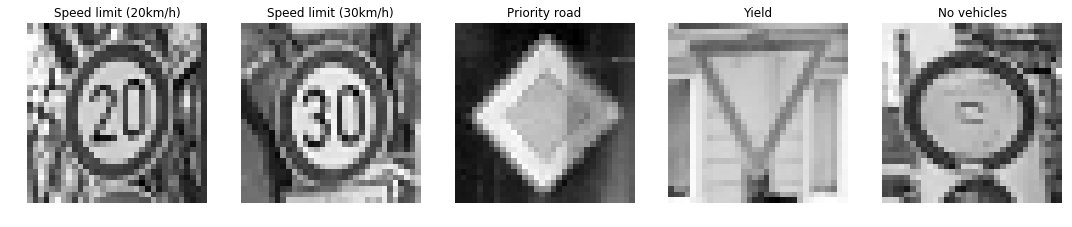

In [26]:
# Output the Images
main_step31()

### Predict the Sign Type for Each Image

In [27]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import cv2
import numpy as np
import pandas as pd

In [28]:
def prediction(args, flags, logits, images_new):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver_new = tf.train.Saver()  # tf.train.import_meta_graph(flags.meta_graph)
        saver_new.restore(sess, tf.train.latest_checkpoint('./'))

        if channel(images_new[0]) == 3:
            x = flags.x3
        else:
            x = flags.x1

        # predict the traffic sign
        prediction_top_1 = tf.argmax(logits, 1)
        prediction_top_5 = tf.nn.top_k(tf.nn.softmax(logits), args.top_k)
        prediction, prediction_top_k = sess.run([prediction_top_1, prediction_top_5], feed_dict={x: images_new, flags.keep_prob: 1.0})

    return prediction.tolist(), prediction_top_k

In [30]:
# parameters and placeholders
args = PARSE_ARGS()
flags = PARAMETERS()

# load new and original data set
X_train, y_train, s_train, c_train = data_load(args.dtset, 'train.p')
args.serie = '_imgOK_/' # '_imgOK_/' # '_serie01_/' # np.uint8(
images_new, labels_new = images_load(args)

# preprocess data
images_new = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images_new])
images_new = (images_new - np.mean(images_new)) / np.std(images_new)
images_new = images_new[..., newaxis]

# predict on new images_new
#tf.reset_default_graph()
cnn    = MODEL()
logits = cnn.model_1(flags, images_new[0])    

In [31]:
predictions, prediction_top_k = prediction(args, flags, logits, images_new)
print(' predictions      : {}'.format(predictions))
print(' expected results : {}'.format(labels_new))
print()

INFO:tensorflow:Restoring parameters from ./model
 predictions      : [0, 1, 12, 13, 9]
 expected results : [0, 1, 12, 13, 15]



### Analyze Performance

In [32]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [33]:
# Helper function: calculate the accuracy of predictions the new images
def performance(labels_new, predictions):
    # predictions = predictions.tolist()
    success_rate = [ 1 if result else 0 for result in [ label == prediction for (label, prediction) in zip(labels_new, predictions) ]]
    try:
        return ( sum(success_rate) / len(success_rate) ) # * 100.0
    except ZeroDivisionError:
        return 0

In [34]:
# measure the prediction success rate
success_rate = performance(labels_new, predictions)
print(' success_rate : {:.1%}'.format(success_rate))

 success_rate : 80.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [56]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import pandas as pd
import random
import matplotlib.pyplot as plt

In [72]:
def predictions_show(args, images_new, labels_new, images_dataset, labels_dataset, prediction_top_k):
    # note: stackoverflow.com/questions/27426668/row-titles-for-matplotlib-subplot
    signnames = pd.read_csv(args.file_csv, index_col=0)
    args.tab[0], args.tab[1] = 5, args.top_k+1
    dico = index_list_per_class(labels_dataset)
    index_new, index_dataset = 0, 0
    

    #fig, ax_lanes = None, None
    fig, ax_lanes = plt.subplots( figsize=(15.0, 15.0) , nrows=args.tab[0], ncols=1 ) # , sharey=True)

    for row, ax_lane in enumerate(ax_lanes, start=1):
        label = labels_new[row-1]
        ax_lane.set_title("Top5 predictions #{} on {} \n".format(row, str(signnames.iloc[label]['SignName']) ), fontsize=16) #, x=0.06)
        # Turn off axis lines and ticks of the lane subplot 
        ax_lane.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
        # remove the white frame
        ax_lane._frameon = False

    for i in range(1, 1 + args.tab[0] * args.tab[1]):
        ax_image = fig.add_subplot(args.tab[0] , 1+args.top_k , i)

        if i in range(1, 1 + args.tab[0] * args.tab[1], args.tab[1]):
            # images_new
            image = images_new[index_new].squeeze()
            label = labels_new[index_new]
            title = 'Input'
            #ax_image.set_xlabel('')
            ax_image.set_xlabel( str(signnames.iloc[labels_new[index_new]]['SignName'])[:25] ) # , fontsize=14)  
            index_new += 1
        else:
            # images_dataset
            classe_id  = prediction_top_k.indices[index_new - 1][index_dataset % (args.tab[1] - 1)]
            prediction = prediction_top_k.values[index_new - 1][index_dataset % (args.tab[1] - 1)] * 100  
            prediction = prediction.astype(int)
            title = str(signnames.iloc[classe_id]['SignName'])[:25]
            index_dataset += 1  
            index = random.randint(dico[classe_id][0], dico[classe_id][-1])  
            image = images_dataset[index].squeeze()
            ax_image.set_xlabel(str(prediction)+'%', fontsize=14)                 
            if classe_id == label:
                image = image_padding(image, border_width=3, color=[34,177,76]) # green = [34,177,76]
            else:
                image = image_padding(image, border_width=3, color=[255,26,26]) # red = [255,26,26]


        ax_image.set_title( title )
        ax_image.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
        plt.imshow(image, cmap=color_map(image))

    plt.tight_layout()
    plt.show()

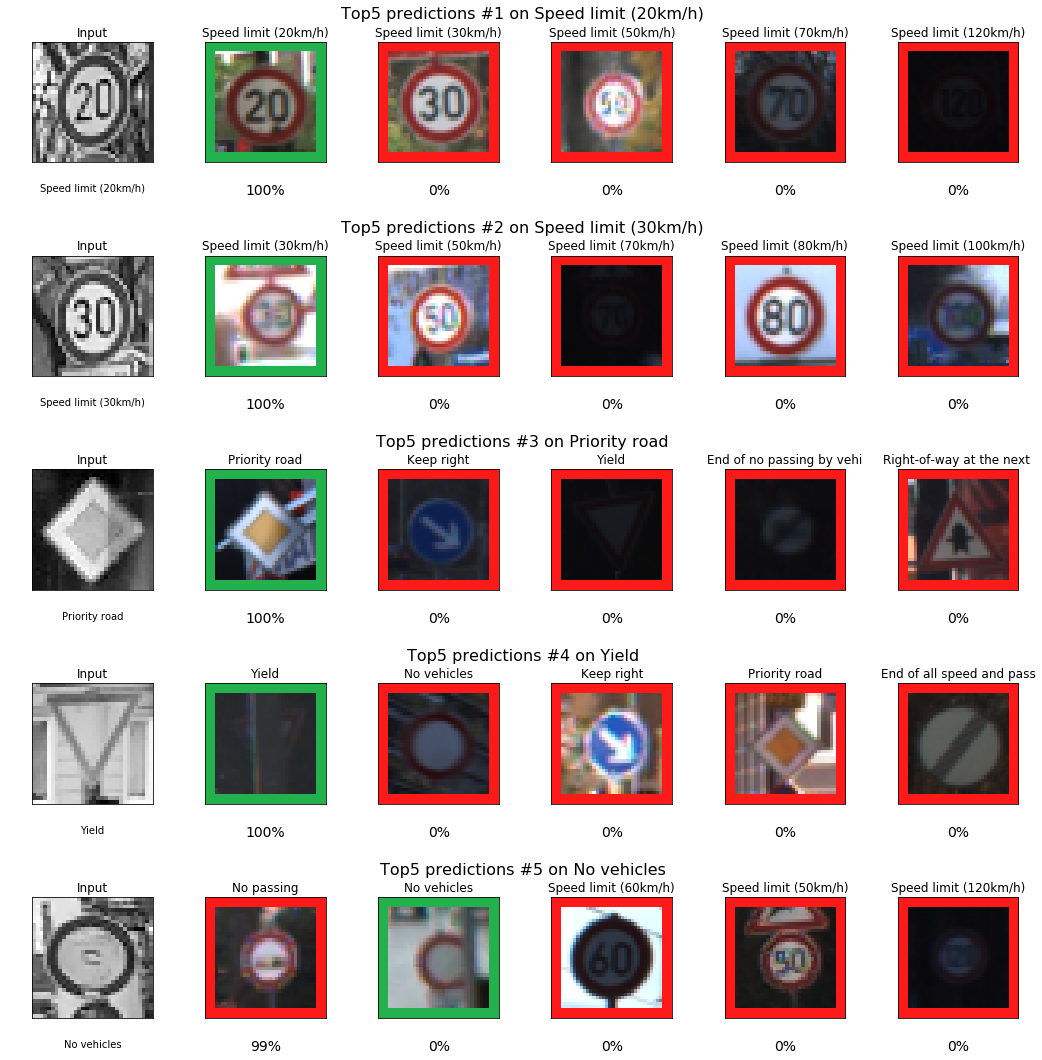

In [73]:
# show top 5 predictions
predictions_show(args, images_new, labels_new, X_valid, y_valid, prediction_top_k=prediction_top_k)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")